In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\LENOVO\Documents\Pizza Sale Analysis\pizza_sales.csv')

print(df.shape)

(48620, 12)


In [4]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
df.describe(include = 'all')

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,26-11-2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [8]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [9]:
# KPIs
total_revenue = df['total_price'].sum()
total_orders = df['order_id'].nunique()
total_pizza_sold = df['quantity'].sum()
average_order_value = total_revenue / total_orders

print("total_revenue =", round(total_revenue))
print("total_orders =", total_orders)
print("total_pizza_sold =", total_pizza_sold)
print("average_order_value =", round(average_order_value))

total_revenue = 817860
total_orders = 21350
total_pizza_sold = 49574
average_order_value = 38


In [40]:
# Fix: Use dayfirst=True
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].head()

# Convert order_time into time
df['order_time_dt'] = pd.to_datetime(df['order_time'],format ='%H:%M:%S')
df['hour'] = df['order_time_dt'].dt.hour

# Extract date parts
df['day'] = df['order_date'].dt.day
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df['day_name'] = df['order_date'].dt.day_name()
df['month_name'] = df['order_date'].dt.month_name()
df['hour'] = df['order_time_dt'].dt.hour

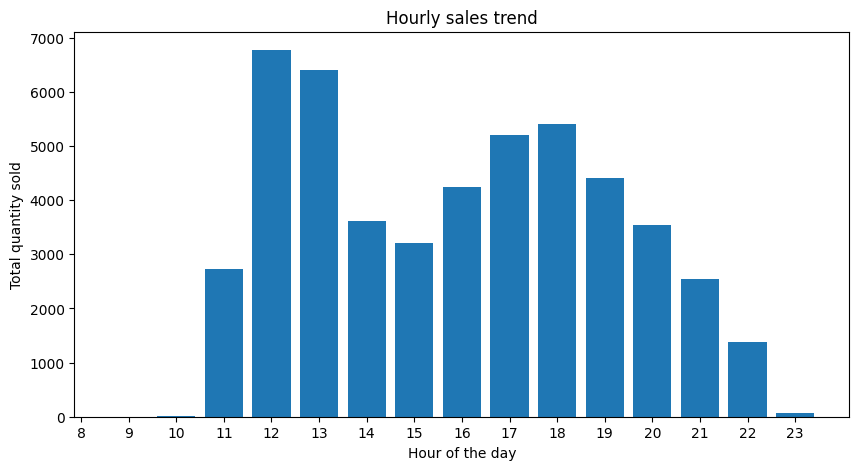

In [43]:
# hourly sales analysis
hourly_sales = df.groupby('hour')['quantity'].sum()
plt.figure(figsize=(10,5))
plt.bar(hourly_sales.index, hourly_sales.values)
plt.xlabel("Hour of the day")
plt.ylabel("Total quantity sold")
plt.title("Hourly sales trend")
plt.xticks(range(8,24))
plt.show()

In [13]:
len(df)

48620

In [14]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [12]:
from sqlalchemy import create_engine

username = 'root'
password = 'Sakshi123sql'
host = 'localhost'
port = '3306'
database = 'pizzadb'

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = 'pizza_sales'
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print(f"✅ Data successfully loaded into table '{table_name}' in database '{database}'.")


✅ Data successfully loaded into table 'pizza_sales' in database 'pizzadb'.
